Newton Polynomial: x*(0.0375757673118033*x**3 - 0.236095509079522*x**2 + 0.0582877134742539*x + 0.981968385299078)

Lagrange Polynomial: x*(0.0375757673118034*x**3 - 0.236095509079522*x**2 + 0.0582877134742539*x + 0.981968385299078)

Modified Lagrange Polynomial: x*(0.0375757673118034*x**3 - 0.236095509079522*x**2 + 0.0582877134742557*x + 0.981968385299077)/(5.55111512312578e-17*x**4 + 4.44089209850063e-16*x**3 + 8.88178419700125e-16*x**2 - 8.88178419700125e-16*x + 1.0)


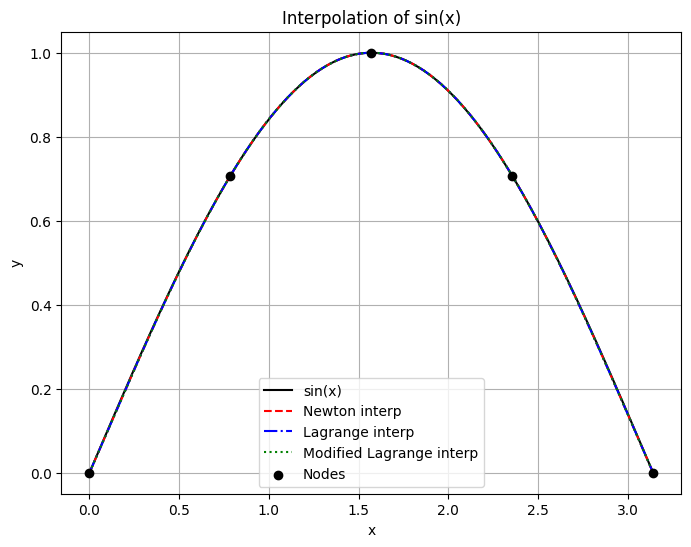


Numerical Error Analysis:
Max error (Newton): 1.811397e-03
Max error (Lagrange): 1.811397e-03
Max error (Modified Lagrange): 1.811397e-03


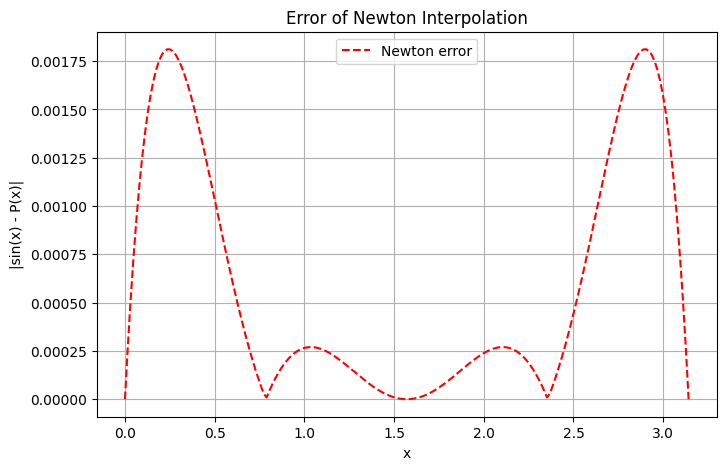

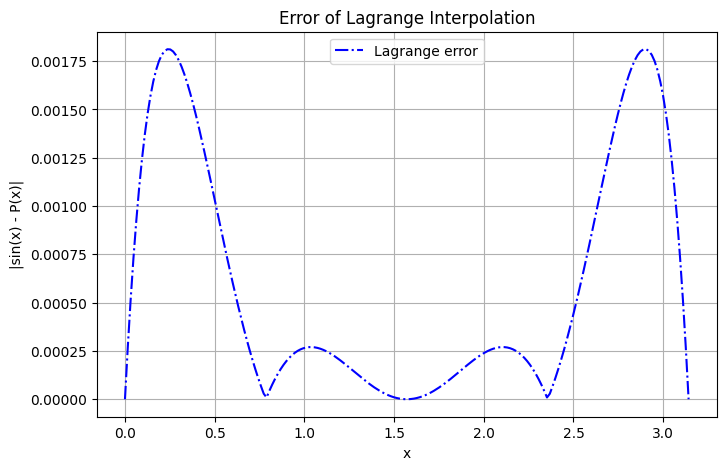

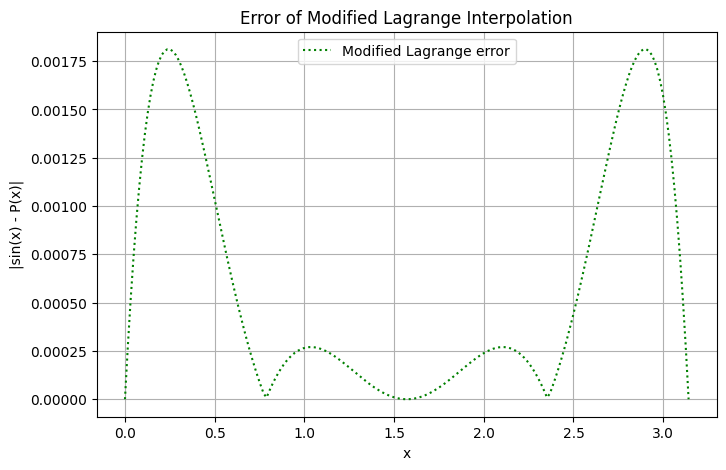

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Function to interpolate
f = sp.sin

# Choose interpolation nodes (example: 5 points on [0, pi])
nodes = np.linspace(0, np.pi, 5)
values = [f(x) for x in nodes]

x = sp.symbols('x')

# --- 1. Newton Interpolation Polynomial ---
def newton_interpolation(xs, ys):
    n = len(xs)
    # Divided difference table
    dd = [[0]*n for _ in range(n)]
    for i in range(n):
        dd[i][0] = ys[i]
    for j in range(1, n):
        for i in range(n-j):
            dd[i][j] = (dd[i+1][j-1] - dd[i][j-1])/(xs[i+j]-xs[i])

    # Construct polynomial
    poly = 0
    for j in range(n):
        term = dd[0][j]
        for k in range(j):
            term *= (x - xs[k])
        poly += term
    return sp.simplify(poly)

newton_poly = newton_interpolation(nodes, values)

# --- 2. Lagrange Interpolation Polynomial ---
def lagrange_interpolation(xs, ys):
    n = len(xs)
    poly = 0
    for i in range(n):
        term = ys[i]
        for j in range(n):
            if i != j:
                term *= (x - xs[j])/(xs[i] - xs[j])
        poly += term
    return sp.simplify(poly)

lagrange_poly = lagrange_interpolation(nodes, values)

# --- 3. Modified Lagrange (barycentric form) ---
def modified_lagrange(xs, ys):
    n = len(xs)
    # Compute barycentric weights
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if j != k:
                w[j] /= (xs[j] - xs[k])

    # Build symbolic expression
    num, den = 0, 0
    for j in range(n):
        num += (w[j]*ys[j])/(x - xs[j])
        den += w[j]/(x - xs[j])
    return sp.simplify(num/den)

modified_lagrange_poly = modified_lagrange(nodes, values)

# Print polynomials
print("Newton Polynomial:", newton_poly)
print("\nLagrange Polynomial:", lagrange_poly)
print("\nModified Lagrange Polynomial:", modified_lagrange_poly)

# --- Evaluate on grid ---
x_vals = np.linspace(0, np.pi, 200)
y_true = np.sin(x_vals)
y_newton = [float(newton_poly.subs(x, val)) for val in x_vals]
y_lagrange = [float(lagrange_poly.subs(x, val)) for val in x_vals]
y_modlag = [float(modified_lagrange_poly.subs(x, val)) for val in x_vals]

# --- Plot interpolation results ---
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_true, 'k-', label='sin(x)')
plt.plot(x_vals, y_newton, 'r--', label='Newton interp')
plt.plot(x_vals, y_lagrange, 'b-.', label='Lagrange interp')
plt.plot(x_vals, y_modlag, 'g:', label='Modified Lagrange interp')
plt.scatter(nodes, np.sin(nodes), c='k', zorder=5, label='Nodes')
plt.legend()
plt.title("Interpolation of sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# --- Numerical Error Analysis ---
err_newton = np.abs(y_true - y_newton)
err_lagrange = np.abs(y_true - y_lagrange)
err_modlag = np.abs(y_true - y_modlag)

print("\nNumerical Error Analysis:")
print(f"Max error (Newton): {np.max(err_newton):.6e}")
print(f"Max error (Lagrange): {np.max(err_lagrange):.6e}")
print(f"Max error (Modified Lagrange): {np.max(err_modlag):.6e}")

# --- Plot error curves separately ---
plt.figure(figsize=(8,5))
plt.plot(x_vals, err_newton, 'r--', label='Newton error')
plt.title("Error of Newton Interpolation")
plt.xlabel("x")
plt.ylabel("|sin(x) - P(x)|")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x_vals, err_lagrange, 'b-.', label='Lagrange error')
plt.title("Error of Lagrange Interpolation")
plt.xlabel("x")
plt.ylabel("|sin(x) - P(x)|")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x_vals, err_modlag, 'g:', label='Modified Lagrange error')
plt.title("Error of Modified Lagrange Interpolation")
plt.xlabel("x")
plt.ylabel("|sin(x) - P(x)|")
plt.grid(True)
plt.legend()
plt.show()
